# Predict flight ticket price

<h3>Import dataset</h3>

- importing dataset from kaggle
    <br>
    <a href="https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh">https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh</a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style("whitegrid")
flights=pd.read_excel('./Data_Train.xlsx')


In [43]:
flights.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [44]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [45]:
flights.dropna(inplace=True)
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [46]:
flights['Date_of_Journey']=pd.to_datetime(flights['Date_of_Journey'],dayfirst=True)
flights['Dep_Time']=pd.to_datetime(flights['Dep_Time'],format='%H:%M').dt.time

In [47]:
flights['Additional_Info']=flights['Additional_Info'].str.replace('No info','No Info')

In [48]:
flights['Duration']=flights['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
flights['Duration']=pd.to_numeric(flights['Duration'])

In [49]:
flights['weekday']=flights[['Date_of_Journey']].apply(lambda x:x.dt.day_name())

<AxesSubplot:xlabel='weekday', ylabel='Price'>

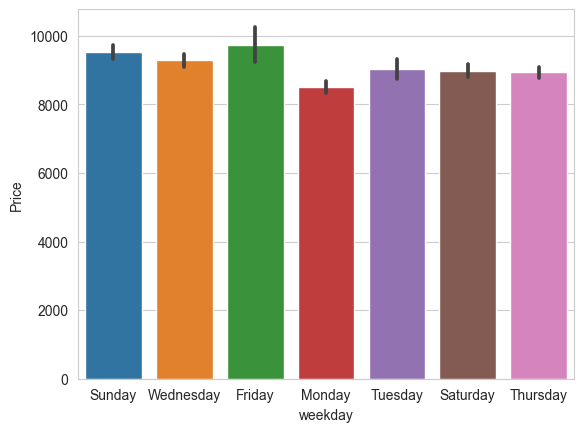

In [50]:
sns.barplot(x='weekday',y='Price',data=flights)

In [51]:
flights["month"] = flights['Date_of_Journey'].map(lambda x: x.month_name())

<AxesSubplot:xlabel='month', ylabel='Price'>

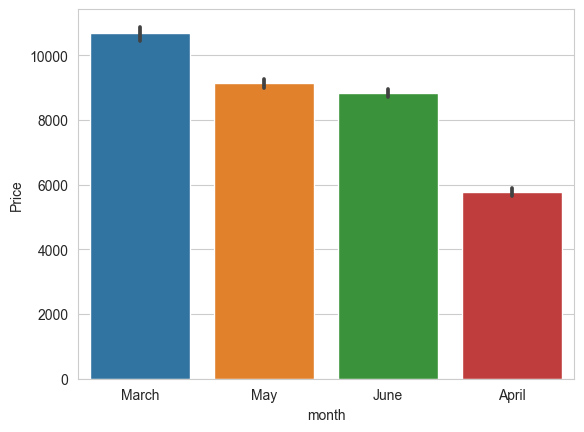

In [52]:
sns.barplot(x='month',y='Price',data=flights)

In [53]:
flights['Dep_Time']=flights['Dep_Time'].apply(lambda x:x.hour)
flights['Dep_Time']=pd.to_numeric(flights['Dep_Time'])

<AxesSubplot:xlabel='Dep_Time', ylabel='Price'>

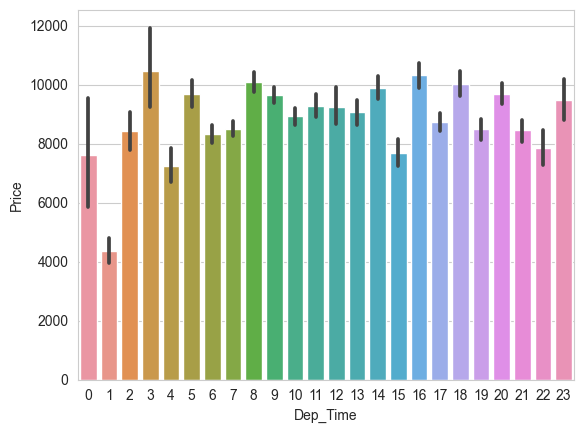

In [54]:
sns.barplot(x='Dep_Time',y='Price',data=flights)

เอาข้อมูลที่ไม่ได้ใช้ออก

In [55]:
flights.drop(['Route','Arrival_Time','Date_of_Journey'],axis=1,inplace=True)

In [56]:
flights.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,weekday,month
0,IndiGo,Banglore,New Delhi,22,170,non-stop,No Info,3897,Sunday,March
1,Air India,Kolkata,Banglore,5,445,2 stops,No Info,7662,Wednesday,May
2,Jet Airways,Delhi,Cochin,9,1140,2 stops,No Info,13882,Sunday,June
3,IndiGo,Kolkata,Banglore,18,325,1 stop,No Info,6218,Sunday,May
4,IndiGo,Banglore,New Delhi,16,285,1 stop,No Info,13302,Friday,March


แปลงข้อมูลทั้งหมดเป็นตัวเลขเพื่อนำไปใช้คำนวน

In [57]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Airline','Source','Destination','Additional_Info','Total_Stops','weekday','month','Dep_Time']
le = LabelEncoder()
for i in var_mod:
    flights[i] = le.fit_transform(flights[i])

In [58]:
flights.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,weekday,month
0,3,0,5,22,170,4,6,3897,3,2
1,1,3,0,5,445,1,6,7662,6,3
2,4,2,1,9,1140,1,6,13882,3,1
3,3,3,0,18,325,0,6,6218,3,3
4,3,0,5,16,285,0,6,13302,0,2


# Pearson's Similarity (Correlation Matrix)
ใช้ pearson similarity โดยคำนวณแบบ martix แต่ในการเปรียบเทียบข้อมูลแต่ละคู้ เราจะใช้vector ของข้อมูล 2 ชุดในการเปรียบเทียบ

<img src="img/pearsons.png" alt="Alternative text" />

<AxesSubplot:>

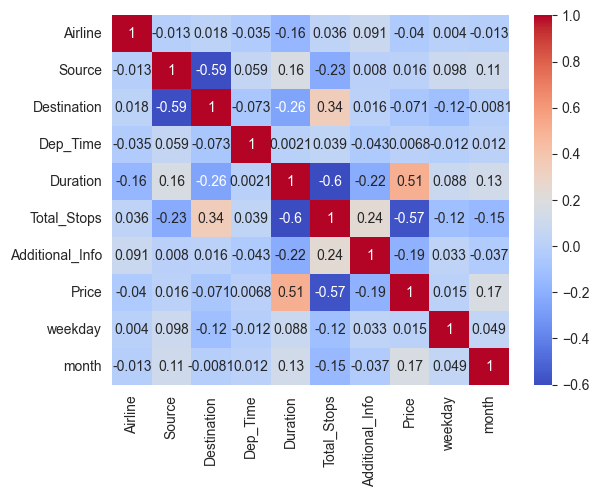

In [59]:
sns.heatmap(flights.corr(),cmap='coolwarm',annot=True)

เอาข้อมูลที่มากกว่า Q3 และน้อยกว่า Q1 ออก เพื่อให้ข้อมูลไม่กระจัดกระจาย

In [60]:
def outlier(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR= Q3-Q1
        LE=Q1-1.5*IQR
        UE=Q3+1.5*IQR
        df[i]=df[i].mask(df[i]<LE,LE)
        df[i]=df[i].mask(df[i]>UE,UE)
    return df

In [61]:
flights=outlier(flights)

In [62]:
x=flights.drop('Price',axis=1)
y=flights['Price']

## Train Test Split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

# Build Model

<h3>Random Forest Process</h3>

<img src="img/randomforest.png" alt="Alternative text" />

__<h5>หลักการทำ Random Forest คือ</h5>__

1. sample ข้อมูล (bootstrapping) จาก data set ทั้งหมด ให้ได้ข้อมูลออกมา n ชุด ที่ไม่เหมือนกัน ตามจำนวน Decision Tree ใน Random Forest เช่น data set ตั้งต้นมีอยู่ 10 feature (X1,X2,…,X10) แต่ละ Decision Tree จะได้ feature ไปไม่เหมือนกัน และ จะได้ข้อมูลไม่ครบทุก row ด้วยจาก data set ทั้งหมดด้วย (X1 -> X1',X2->X2',…)
1. สร้าง model Decision Tree สำหรับแต่ละชุดข้อมูล
1. ทำ aggregation ผลลัพธ์ จากแต่ละ model (bagging) เช่น voting ในกรณี classification หรือ หาค่า mean ในกรณี regression

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rfr=RandomForestRegressor(n_estimators=500)

In [67]:
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500)

หาชุดข้อมูลที่มีผลต่อการคาดการณ์ราคามากที่สุด

Text(0.5, 0, 'Relative Importance')

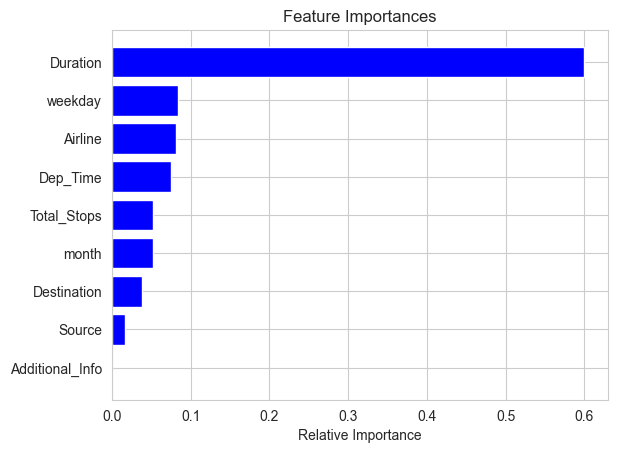

In [68]:
features=x.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [69]:
predictions=rfr.predict(x_test)

In [70]:
predictions=rfr.predict(x_test)

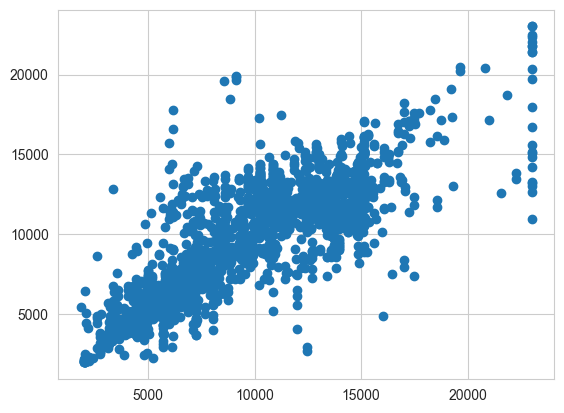

In [71]:
plt.scatter(y_test,predictions)

In [72]:
from sklearn import metrics

In [73]:
print('mean absolute error:', metrics.mean_absolute_error(y_test, predictions))
print('mean squared error:', metrics.mean_squared_error(y_test, predictions))
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('score:', (metrics.r2_score(y_test, predictions)))

mean absolute error: 1516.5144451568754
mean squared error: 5364053.464130434
root mean squared error: 2316.042630033056
score: 0.7062321943396197


แสดงความคลาดเคลื่อนว่าแต่ละค่าเป็นอิสระต่อกัน ส่วนเหลือจะมีค่าเฉลี่ยเป็น 0 แสดงว่าพยากรณ์นี้มีความแม่นยำสูง

<AxesSubplot:xlabel='Price', ylabel='Count'>

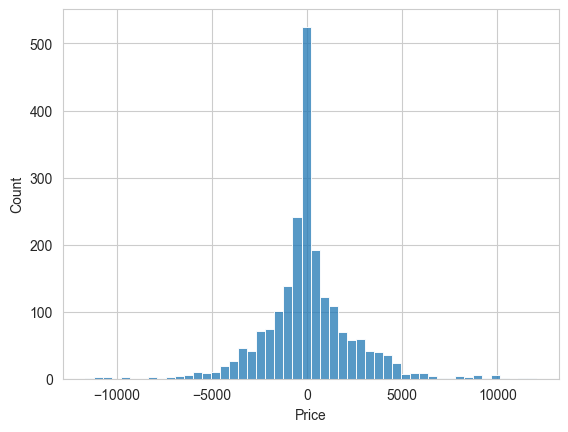

In [74]:
sns.histplot((y_test-predictions),bins=50)

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,make_scorer
from sklearn.model_selection import cross_val_score
regg=[LinearRegression(),RandomForestRegressor(),SVR(),DecisionTreeRegressor()]
mean=[]
std=[]
for i in regg:
    cvs=cross_val_score(i,x,y,cv=5,scoring=make_scorer(r2_score))
    mean.append(np.mean(cvs))
    std.append(np.std(cvs))

In [76]:
for i in range(4):
    print(regg[i].__class__.__name__,':',mean[i])

LinearRegression : 0.45338194040745083
RandomForestRegressor : 0.7057356817798427
SVR : 0.1940128418133764
DecisionTreeRegressor : 0.5875571575574675


ลองคำนวณกับชุดข้อมูลตัวอย่างที่มีอยู่แล้ว

In [77]:
test_file=pd.read_excel('Test_set.xlsx')

In [78]:
test_file.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [79]:
test_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [80]:
test_file['Date_of_Journey']=pd.to_datetime(test_file['Date_of_Journey'],dayfirst=True)
test_file['Dep_Time']=pd.to_datetime(test_file['Dep_Time'],format='%H:%M').dt.time
test_file['Duration']=test_file['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_file['Duration']=pd.to_numeric(test_file['Duration'])
test_file['Dep_Time']=test_file['Dep_Time'].apply(lambda x:x.hour)
test_file['Dep_Time']=pd.to_numeric(test_file['Dep_Time'])
test_file["month"] = test_file['Date_of_Journey'].map(lambda x: x.month_name())
test_file['weekday']=test_file[['Date_of_Journey']].apply(lambda x:x.dt.day_name())
test_file['Additional_Info']=test_file['Additional_Info'].str.replace('No info','No Info')
test_file.drop(['Date_of_Journey','Route','Arrival_Time'],axis=1,inplace=True)
for i in var_mod:
    test_file[i]=le.fit_transform(test_file[i])

In [81]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
test_price_predictions=rfr.predict(test_file)

In [82]:
test_price_predictions

array([12898.85133333,  4509.168     , 14655.53786905, ...,
       14068.3822    ,  8389.162     , 14554.641     ])